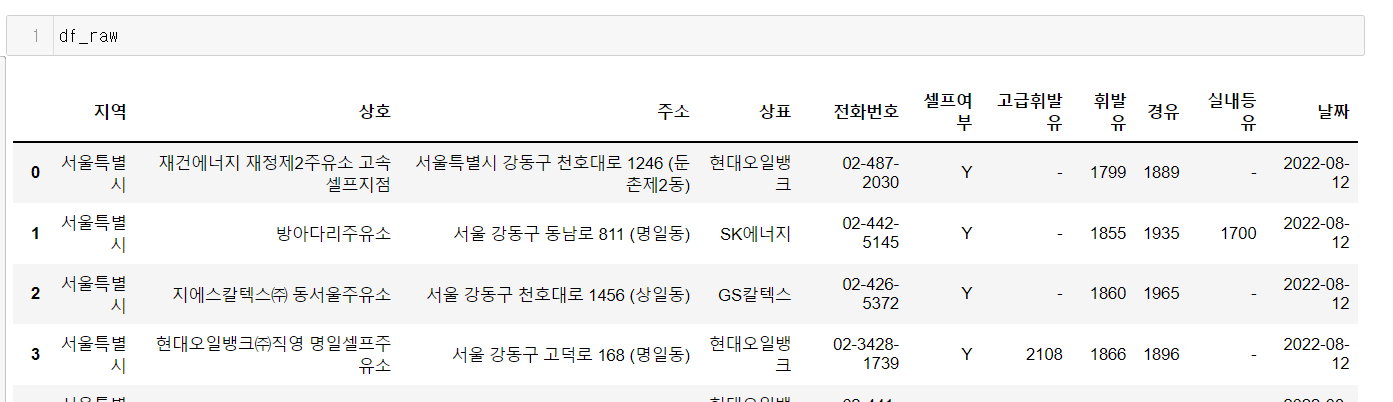
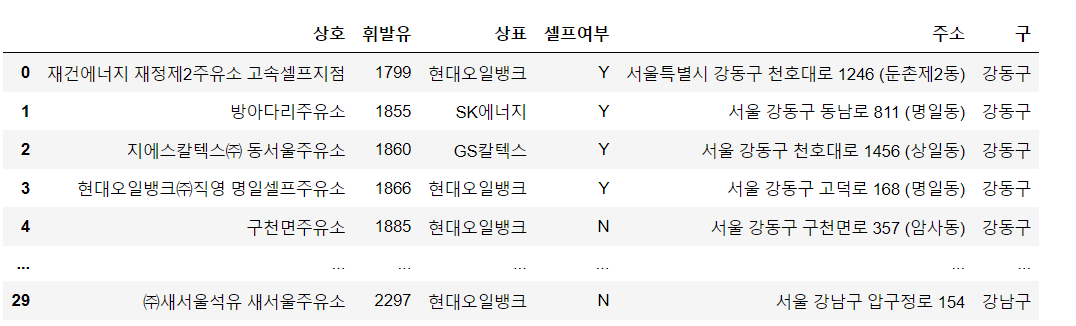

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 유니코드에서  음수 부호설정

In [40]:
# 서울시 구별 주유비 파일 모두 합치기  (P183)
files=glob('./data/*.xls')

tmp_file=[]
for file in files:
    tmp=pd.read_excel(file,header=2)
    tmp_file.append(tmp)
df_raw=pd.concat(tmp_file)

In [41]:
#현재일 입력
df_raw['날짜']=datetime.now().date()

In [42]:
df_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유,날짜
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1799,1889,-,2022-08-12
1,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1855,1935,1700,2022-08-12
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1860,1965,-,2022-08-12
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2108,1866,1896,-,2022-08-12
4,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1885,1897,-,2022-08-12
...,...,...,...,...,...,...,...,...,...,...,...
29,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,현대오일뱅크,02-543-1154,N,2497,2297,2359,-,2022-08-12
30,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2599,2299,2333,1846,2022-08-12
31,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2680,2390,2475,1840,2022-08-12
32,서울특별시,갤러리아주유소,서울 강남구 압구정로 426,SK에너지,02-540-4965,N,2661,2466,2461,-,2022-08-12


In [43]:
#필요한 컴럼만 필터링
cols=['상호','휘발유','상표','셀프여부','주소']
df=df_raw[cols]
df

,상호,휘발유,상표,셀프여부,주소
0,재건에너지 재정제2주유소 고속셀프지점,1799,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동)
1,방아다리주유소,1855,SK에너지,Y,서울 강동구 동남로 811 (명일동)
2,지에스칼텍스㈜ 동서울주유소,1860,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동)
3,현대오일뱅크㈜직영 명일셀프주유소,1866,현대오일뱅크,Y,서울 강동구 고덕로 168 (명일동)
4,구천면주유소,1885,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동)
...,...,...,...,...,...
29,㈜새서울석유 새서울주유소,2297,현대오일뱅크,N,서울 강남구 압구정로 154
30,대청주유소,2299,SK에너지,N,서울 강남구 개포로 654 (일원동)
31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동)
32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426


In [44]:
#주소에서 구만 추출
df['구']=[i.split()[1] for i in df['주소']]
df

C:\Users\hmh\AppData\Local\Temp\ipykernel_28340\2159142384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구']=[i.split()[1] for i in df['주소']]


,상호,휘발유,상표,셀프여부,주소,구
0,재건에너지 재정제2주유소 고속셀프지점,1799,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구
1,방아다리주유소,1855,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구
2,지에스칼텍스㈜ 동서울주유소,1860,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동),강동구
3,현대오일뱅크㈜직영 명일셀프주유소,1866,현대오일뱅크,Y,서울 강동구 고덕로 168 (명일동),강동구
4,구천면주유소,1885,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
...,...,...,...,...,...,...
29,㈜새서울석유 새서울주유소,2297,현대오일뱅크,N,서울 강남구 압구정로 154,강남구
30,대청주유소,2299,SK에너지,N,서울 강남구 개포로 654 (일원동),강남구
31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구
32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구


In [46]:
#구 종류 확인
df['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      454 non-null    object
 1   휘발유     454 non-null    object
 2   상표      454 non-null    object
 3   셀프여부    454 non-null    object
 4   주소      454 non-null    object
 5   구       454 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [49]:
#휘발유이름을 가격변경
df.columns=['상호', '가격', '상표', '셀프여부', '주소', '구']

In [51]:
#가격을 int형으로 변환
df['가격'].astype('int')

ValueError: invalid literal for int() with base 10: '-'

In [62]:
#가격'-' 확인하고 '-'아닌 것만 필터링
df=df[df['가격']!='-']

In [65]:
df=df.reset_index()

In [66]:
df

,index,상호,가격,상표,셀프여부,주소,구
0,0,재건에너지 재정제2주유소 고속셀프지점,1799,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구
1,1,방아다리주유소,1855,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구
2,2,지에스칼텍스㈜ 동서울주유소,1860,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동),강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,1866,현대오일뱅크,Y,서울 강동구 고덕로 168 (명일동),강동구
4,4,구천면주유소,1885,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
...,...,...,...,...,...,...,...
442,29,㈜새서울석유 새서울주유소,2297,현대오일뱅크,N,서울 강남구 압구정로 154,강남구
443,30,대청주유소,2299,SK에너지,N,서울 강남구 개포로 654 (일원동),강남구
444,31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구
445,32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구


In [69]:
df['가격']=df['가격'].astype('int')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   447 non-null    int64 
 1   상호      447 non-null    object
 2   가격      447 non-null    int32 
 3   상표      447 non-null    object
 4   셀프여부    447 non-null    object
 5   주소      447 non-null    object
 6   구       447 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 22.8+ KB


In [71]:
df

,index,상호,가격,상표,셀프여부,주소,구
0,0,재건에너지 재정제2주유소 고속셀프지점,1799,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구
1,1,방아다리주유소,1855,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구
2,2,지에스칼텍스㈜ 동서울주유소,1860,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동),강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,1866,현대오일뱅크,Y,서울 강동구 고덕로 168 (명일동),강동구
4,4,구천면주유소,1885,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
...,...,...,...,...,...,...,...
442,29,㈜새서울석유 새서울주유소,2297,현대오일뱅크,N,서울 강남구 압구정로 154,강남구
443,30,대청주유소,2299,SK에너지,N,서울 강남구 개포로 654 (일원동),강남구
444,31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구
445,32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구


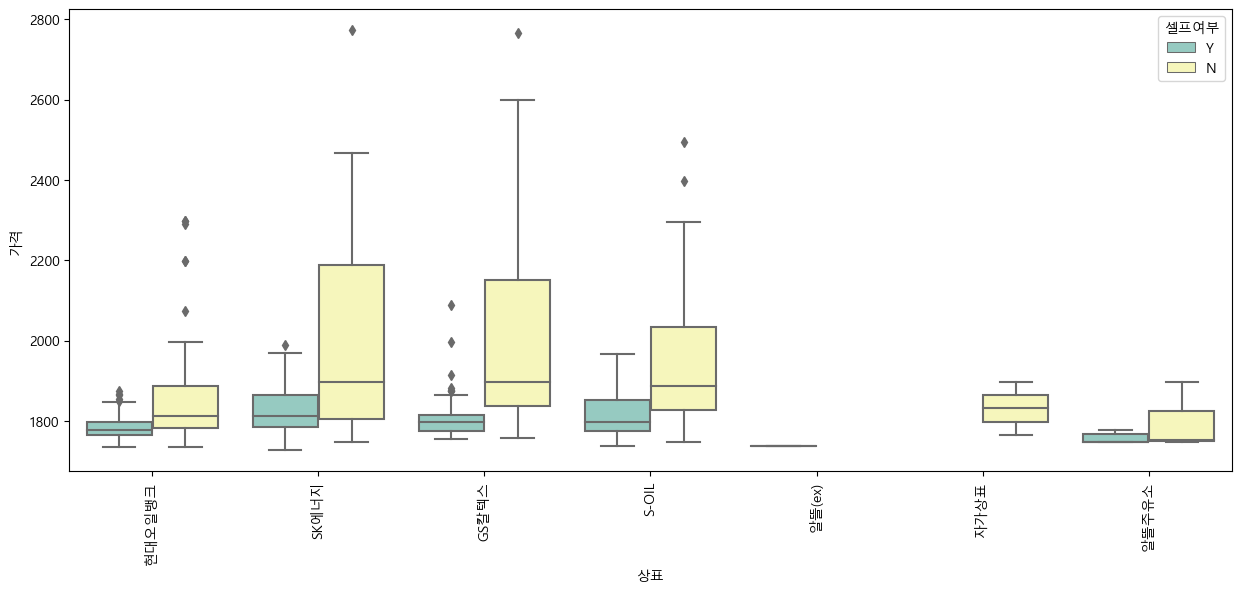

In [105]:
plt.figure(figsize=(15,6))
sns.boxplot(x='상표',y='가격',data=df,hue='셀프여부',palette='Set3' )
plt.xticks(rotation=90)
plt.show()

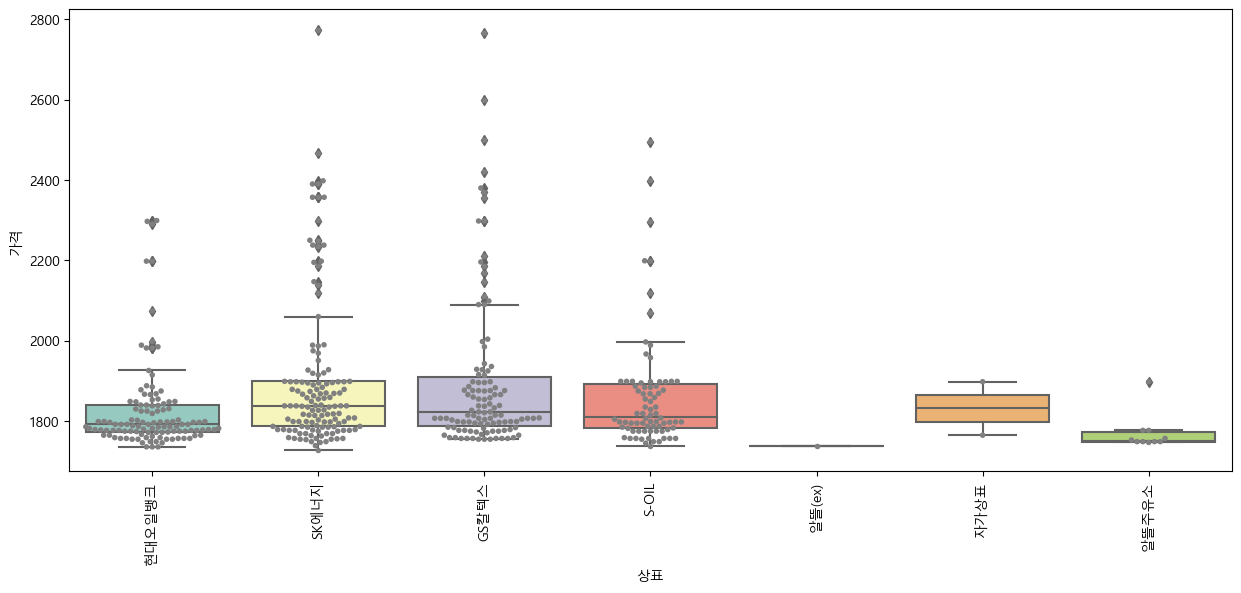

In [137]:
plt.figure(figsize=(15,6))
sns.boxplot(x='상표',y='가격',data=df,palette='Set3' )
sns.swarmplot(x='상표',y='가격',data=df,size=4, color='.5')
plt.xticks(rotation=90)
plt.show()

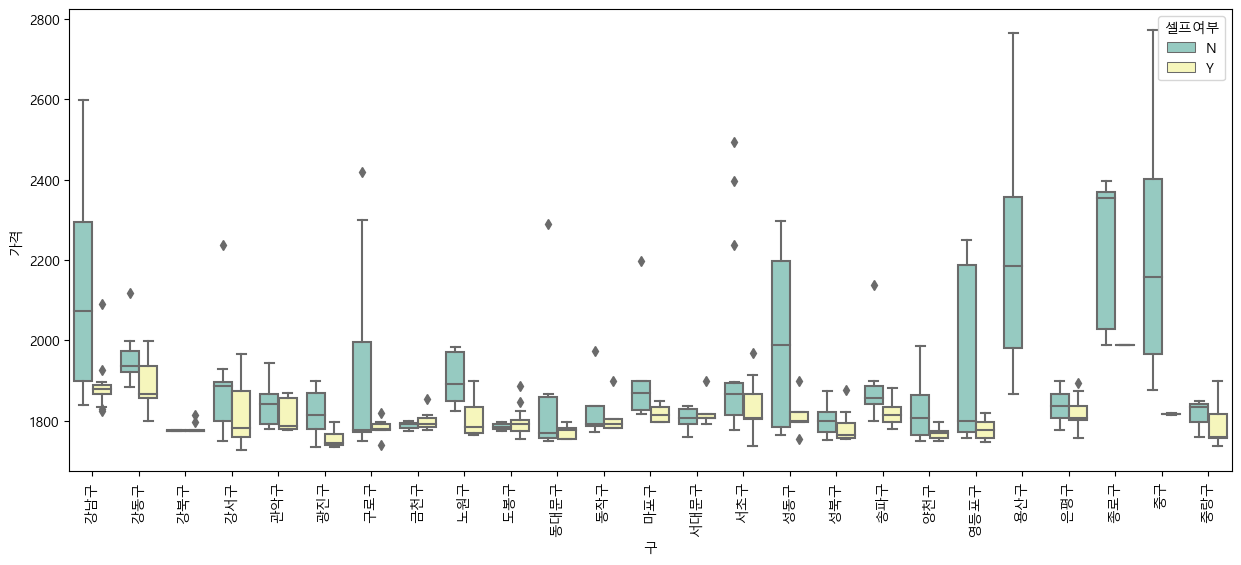

In [139]:
plt.figure(figsize=(15,6))
sns.boxplot(x='구',y='가격',data=df.sort_values('구'),hue='셀프여부',palette='Set3' )
plt.xticks(rotation=90)
plt.show()

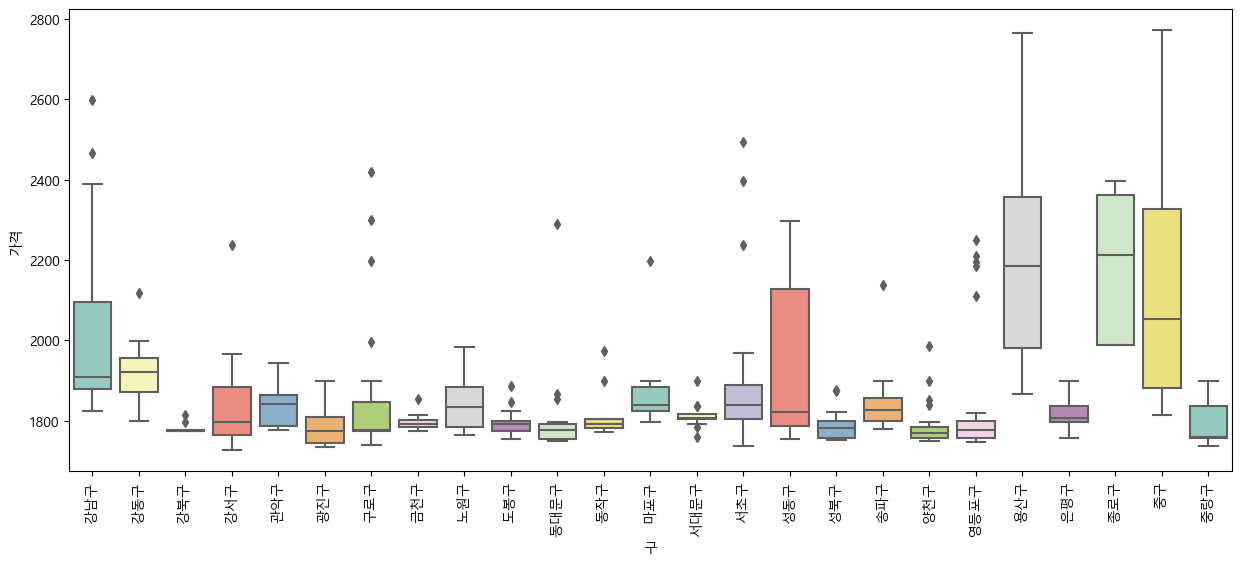

In [145]:
plt.figure(figsize=(15,6))
sns.boxplot(x='구',y='가격',data=df.sort_values('구'),palette='Set3' )
plt.xticks(rotation=90)
plt.show()

C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


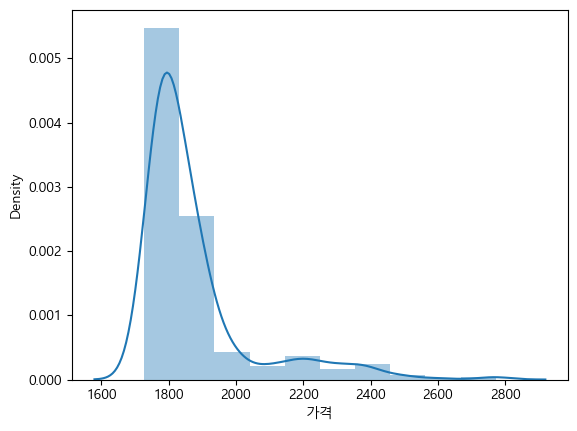

In [155]:
sns.distplot(df['가격'],bins=10);


###  [미션1]구별 주유비 가장 저렴한 5곳 추출

### [미션2] 구별 주유소 갯수 확인

### [미션2] 구별 상품별 주유소 갯수확인